# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Dataset" data-toc-modified-id="Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset</a></div><div class="lev2 toc-item"><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data cleaning</a></div><div class="lev1 toc-item"><a href="#Model" data-toc-modified-id="Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model</a></div><div class="lev1 toc-item"><a href="#Optimize-hyperparameters-using-district-27" data-toc-modified-id="Optimize-hyperparameters-using-district-27-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Optimize hyperparameters using district 27</a></div><div class="lev1 toc-item"><a href="#Get-posterior-mean-$\hat\beta$" data-toc-modified-id="Get-posterior-mean-$\hat\beta$-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Get posterior mean <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-192-Frame" tabindex="0" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mrow class=&quot;MJX-TeXAtom-ORD&quot;><mover><mi>&amp;#x03B2;</mi><mo stretchy=&quot;false&quot;>&amp;#x005E;</mo></mover></mrow></math>" role="presentation" style="position: relative;"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-7983" role="math" style="width: 0.643em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.514em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.188em 1000.51em 2.502em -999.998em); top: -2.21em; left: 0.002em;"><span class="mrow" id="MathJax-Span-7984"><span class="texatom" id="MathJax-Span-7985"><span class="mrow" id="MathJax-Span-7986"><span class="munderover" id="MathJax-Span-7987"><span style="display: inline-block; position: relative; width: 0.514em; height: 0px;"><span style="position: absolute; clip: rect(3.239em 1000.51em 4.296em -999.998em); top: -4.005em; left: 0.002em;"><span class="mi" id="MathJax-Span-7988" style="font-family: STIXMathJax_Main-italic;">β<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.002em;"></span></span><span style="display: inline-block; width: 0px; height: 4.008em;"></span></span><span style="position: absolute; top: -4.261em; left: 0.13em;"><span style="height: 0.002em; vertical-align: 0.002em; width: 0.386em; display: inline-block; overflow: hidden;"></span><span class="mo" id="MathJax-Span-7989" style="font-family: STIXMathJax_Main;">̂&nbsp;<span style="height: 0.002em; vertical-align: 0.002em; margin-left: -0.255em;"></span></span><span style="display: inline-block; overflow: hidden; height: 1px; width: 0.002em;"></span><span style="display: inline-block; width: 0px; height: 4.008em;"></span></span></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.213em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.267em; border-left: 0px solid; width: 0px; height: 1.425em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mrow class="MJX-TeXAtom-ORD"><mover><mi>β</mi><mo stretchy="false">^</mo></mover></mrow></math></span></span><script type="math/tex" id="MathJax-Element-192">\hat\beta</script></a></div><div class="lev1 toc-item"><a href="#Fit-GPs-to-residuals" data-toc-modified-id="Fit-GPs-to-residuals-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Fit GPs to residuals</a></div><div class="lev1 toc-item"><a href="#Pairwise-treatment-effect" data-toc-modified-id="Pairwise-treatment-effect-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Pairwise treatment effect</a></div><div class="lev1 toc-item"><a href="#Next-steps" data-toc-modified-id="Next-steps-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Next steps</a></div>

$$
    \newcommand{\genericdel}[3]{%
      \left#1#3\right#2
    }
    \newcommand{\del}[1]{\genericdel(){#1}}
    \newcommand{\sbr}[1]{\genericdel[]{#1}}
    \newcommand{\cbr}[1]{\genericdel\{\}{#1}}
    \newcommand{\abs}[1]{\genericdel||{#1}}
    \DeclareMathOperator*{\argmin}{arg\,min}
    \DeclareMathOperator*{\argmax}{arg\,max}
    \DeclareMathOperator{\Pr}{\mathbb{p}}
    \DeclareMathOperator{\E}{\mathbb{E}}
    \DeclareMathOperator{\V}{\mathbb{V}}
    \DeclareMathOperator{\Ind}{\mathbb{I}}
    \DeclareMathOperator{\var}{var}
    \DeclareMathOperator{\cov}{cov}
    \DeclareMathOperator{\invchi}{\mathrm{Inv-\chi}^2}
    \DeclareMathOperator*{\argmin}{arg\,min}
    \DeclareMathOperator*{\argmax}{arg\,max}
    \DeclareMathOperator{\normal}{\mathcal{N}}
    \DeclareMathOperator{\unif}{Uniform}
    \DeclareMathOperator{\GP}{\mathcal{GP}}
    \DeclareMathOperator{\scrl}{\mathscr{l}}
    \newcommand{\saleprice}{\mathtt{SalePrice}}
    \newcommand{\sqft}{\mathtt{SQFT}}
    \newcommand{\xvec}{\mathbf{x}}
    \newcommand{\tax}{\mathtt{TaxClass}}
    \newcommand{\building}{\mathtt{BuildingClass}}
    \newcommand{\trans}{^{\intercal}}
$$

The New York City school district is itself divided into sub-districts. From now on, by “district”, I will be talking about these sub-districts. Residents are guaranteed a slot in a school within their district, but there is some system whereby a child can apply to attend schools outside of the district, which might possibly dampen the treatment effect.

Our goal is to detect discontinuities in the price of housing across the school district boundaries.

In [1]:
using LaTeXStrings
using GaussianProcesses
using GaussianProcesses: grad_slice!, cov!, addcov!, KernelData
import GaussianProcesses: get_params, set_params!, num_params
import GaussianProcesses: distance, optimize!
import GaussianProcesses: Mean, Kernel, grad_stack!, grad_stack
import PDMats: AbstractPDMat, PDMat
using Distributions
using Base.LinAlg
using Distances
using DataFrames
using GeoJSON
using Optim
using GLM
import MultivariateStats
mvst=MultivariateStats

import PyPlot; plt=PyPlot
plt.rc("figure", dpi=300.0)
# plt.rc("figure", figsize=(6,4))
# plt.rc("figure", autolayout=true)
plt.rc("savefig", dpi=300.0)
plt.rc("text", usetex=true)
plt.rc("font", family="serif")
plt.rc("font", serif="Palatino")
;

In [2]:
NYC_sales=readtable("NYC_data/processed/NYC_sales.csv", header=true)
# categorical variables
pool!(NYC_sales, [:BOROUGH,
    :BUILDING_CLASS_CATEGORY,
    :BUILDING_CLASS_AT_TIME_OF_SALE,
    :ZIP_CODE,
    :TAX_CLASS_AT_PRESENT,
    :TAX_CLASS_AT_TIME_OF_SALE,
    :NEIGHBORHOOD,
    ])
    

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in pool!(::DataFrames.DataFrame, ::Vararg{Any,N}) at ./deprecated.jl:30
 in include_string(::String, ::String) at ./loading.jl:441
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/imolk/.julia/v0.5/IJulia/src/execute_request.jl:175
 in eventloop(::ZMQ.Socket) at /Users/imolk/.julia/v0.5/IJulia/src/eventloop.jl:8
 in (::IJulia.##9#15)() at ./task.jl:360
while loading In[2], in expression starting on line 3


In [3]:
NYC_sales[:logSalePricePerSQFT] = map(log, NYC_sales[:SALE_PRICE]; lift=true) .- map(log, NYC_sales[:GROSS_SQUARE_FEET]; lift=true)
believable = zeros(Bool, size(NYC_sales,1))
removed=zeros(Int, 10)
for i in 1:size(NYC_sales,1)
    if NYC_sales[i,:SALE_PRICE].isnull
        removed[1] += 1
        continue
    end
    if get(NYC_sales[i,:SchDistr])==0
        removed[2] += 1
        continue
    end
    if NYC_sales[i,:BUILDING_CLASS_AT_TIME_OF_SALE].isnull
        removed[3] += 1
        continue
    end
    if NYC_sales[i,:TAX_CLASS_AT_TIME_OF_SALE].isnull
        removed[4] += 1
        continue
    end
    if NYC_sales[i,:GROSS_SQUARE_FEET].isnull
        removed[5] += 1
        continue
    end
    if get(NYC_sales[i,:GROSS_SQUARE_FEET])<100.0
        removed[6] += 1
        continue
    end
    if get(NYC_sales[i,:logSalePricePerSQFT]) < 3.0
        removed[7] += 1
        # that's too cheap
        continue
    end
    if get(NYC_sales[i,:logSalePricePerSQFT]) > 8.0
        removed[8] += 1
        # that's too expensive
        continue
    end
    if NYC_sales[i,:X_PRJ].isnull
        removed[9] += 1
        continue
    end
    if NYC_sales[i,:Y_PRJ].isnull
        removed[10] += 1
        continue
    end
    believable[i] = true
end

nobsv_ = sum(believable)
for_mm = copy(NYC_sales[believable,:])
reordering = collect(1:nobsv_)
schdistrs = unique(for_mm[:,:SchDistr].values)
istart = 1
for name in schdistrs
    indices = find(for_mm[:SchDistr].values .== name)
    nobsv_schdistr = length(indices)
    iend = istart+nobsv_schdistr-1
    reordering[istart:iend,:] = indices
    istart = iend+1
end
for_mm = for_mm[reordering,:]
schdistr_indices = Dict{Int,Vector{Int}}()
for name in schdistrs
    indices = find(for_mm[:SchDistr].values .== name)
    schdistr_indices[name] = indices
end
;
Y_dict=Dict{Int, Vector{Float64}}()
X_dict=Dict{Int, Array{Float64,2}}()
for name in schdistrs
    Y_dict[name] = for_mm[schdistr_indices[name], :logSalePricePerSQFT]
    X_dict[name] = for_mm[schdistr_indices[name],[:X_PRJ, :Y_PRJ]]
end
sentinels_json=GeoJSON.parsefile("NYC_data/processed/SchoolDistrict_borders/SchoolDistrict_sentinels.json")
sentinels=Dict{Tuple{Int,Int},GeoJSON.MultiPoint}()
for f in sentinels_json.features
    key = (f.properties["SchoolDistrict1"], f.properties["SchoolDistrict2"])
    sentinels[key] = f.geometry
end

# Dataset

New York publishes a year's worth of house sales on a rolling basis. Annoyingly, this means that data that is older than a year disappears, and I've not been able to find this data online. But New York is a density, so even just a year's data is quite a large dataset.

I also have some covariates, though somewhat less rich than I found in Tucson. What I have is square footage, tax class and building class. I've geocoded the address of each sale to get a latitude and longitude, and projected the coordinates onto a Euclidean plane in order to be able to calculate distances.

![sales map](NYC_plots/NYC_sales.png)

## Data cleaning

I remove the following sales:

* any sale with missing data in the sale price, square footage, property covariates, geographical coordinates (due to failed geocoding)
* sales outside of any NYC school district
* properties smaller than 100 sq ft
* outliers in the price per sqft, which I defined as sales outside of $3 < Y_i < 8$

I remove tiny properties because I feel like they might behave differently than the rest of the market.
Removing outliers is possibly contentious, but it makes sense to me that some sales between friends or family members could have a very low $Y_i$ that isn't a true representation of the market price, and that some high prices could be equally disconnected from the market.

This leaves {{sum(believable)}} out of {{length(believable)}} sales records in NYC, mostly because of properties that don't have a reported gross square footage.

# Model

I decided to define the outcome to be the log price per square foot. The model is a Gaussian Process in the spatial covariates on top of a ridge regression on the property covariates (building and tax class). Within a school district we could write the model as [suggestions for clearer notation welcome]:

\begin{align}
    Y_i &= \log\del{ \frac{\saleprice_i}{\sqft_i}} = \beta_0 + \beta_{1\tax\sbr{i}} + \beta_{2\building\sbr{i}} + f(\xvec_i) + \epsilon_i \\
    \epsilon_i &\sim \normal\del{0, \sigma_y^2} \\
    \beta_{1j},\beta_{2j} &\sim \normal\del{0, \sigma_\beta^2} \\
    f(\xvec_i) &\sim \GP\del{0, k(\xvec, \xvec')} \\
    k(\xvec, \xvec') &= \sigma_f^2 \exp\cbr{ - (\xvec-\xvec')\trans(\xvec-\xvec') / 2\scrl^2}
\end{align}

A visual inspection of the house sales map above led me to focus on the boundary between districts 19 and 27. I found a map online of average maths performance in each school district, which shows that districts 19 and 27 are quite different. It's important to note that the boundary between the two districts is also part of the boundary between Brooklyn and Queens, so we won't be able to attribute a causal effect solely to the difference in school districts. A histogram of $Y$ in both districts also shows that marginally the house prices are very different.

![districts](NYC_plots/NYC_school_performances_croppped.png)

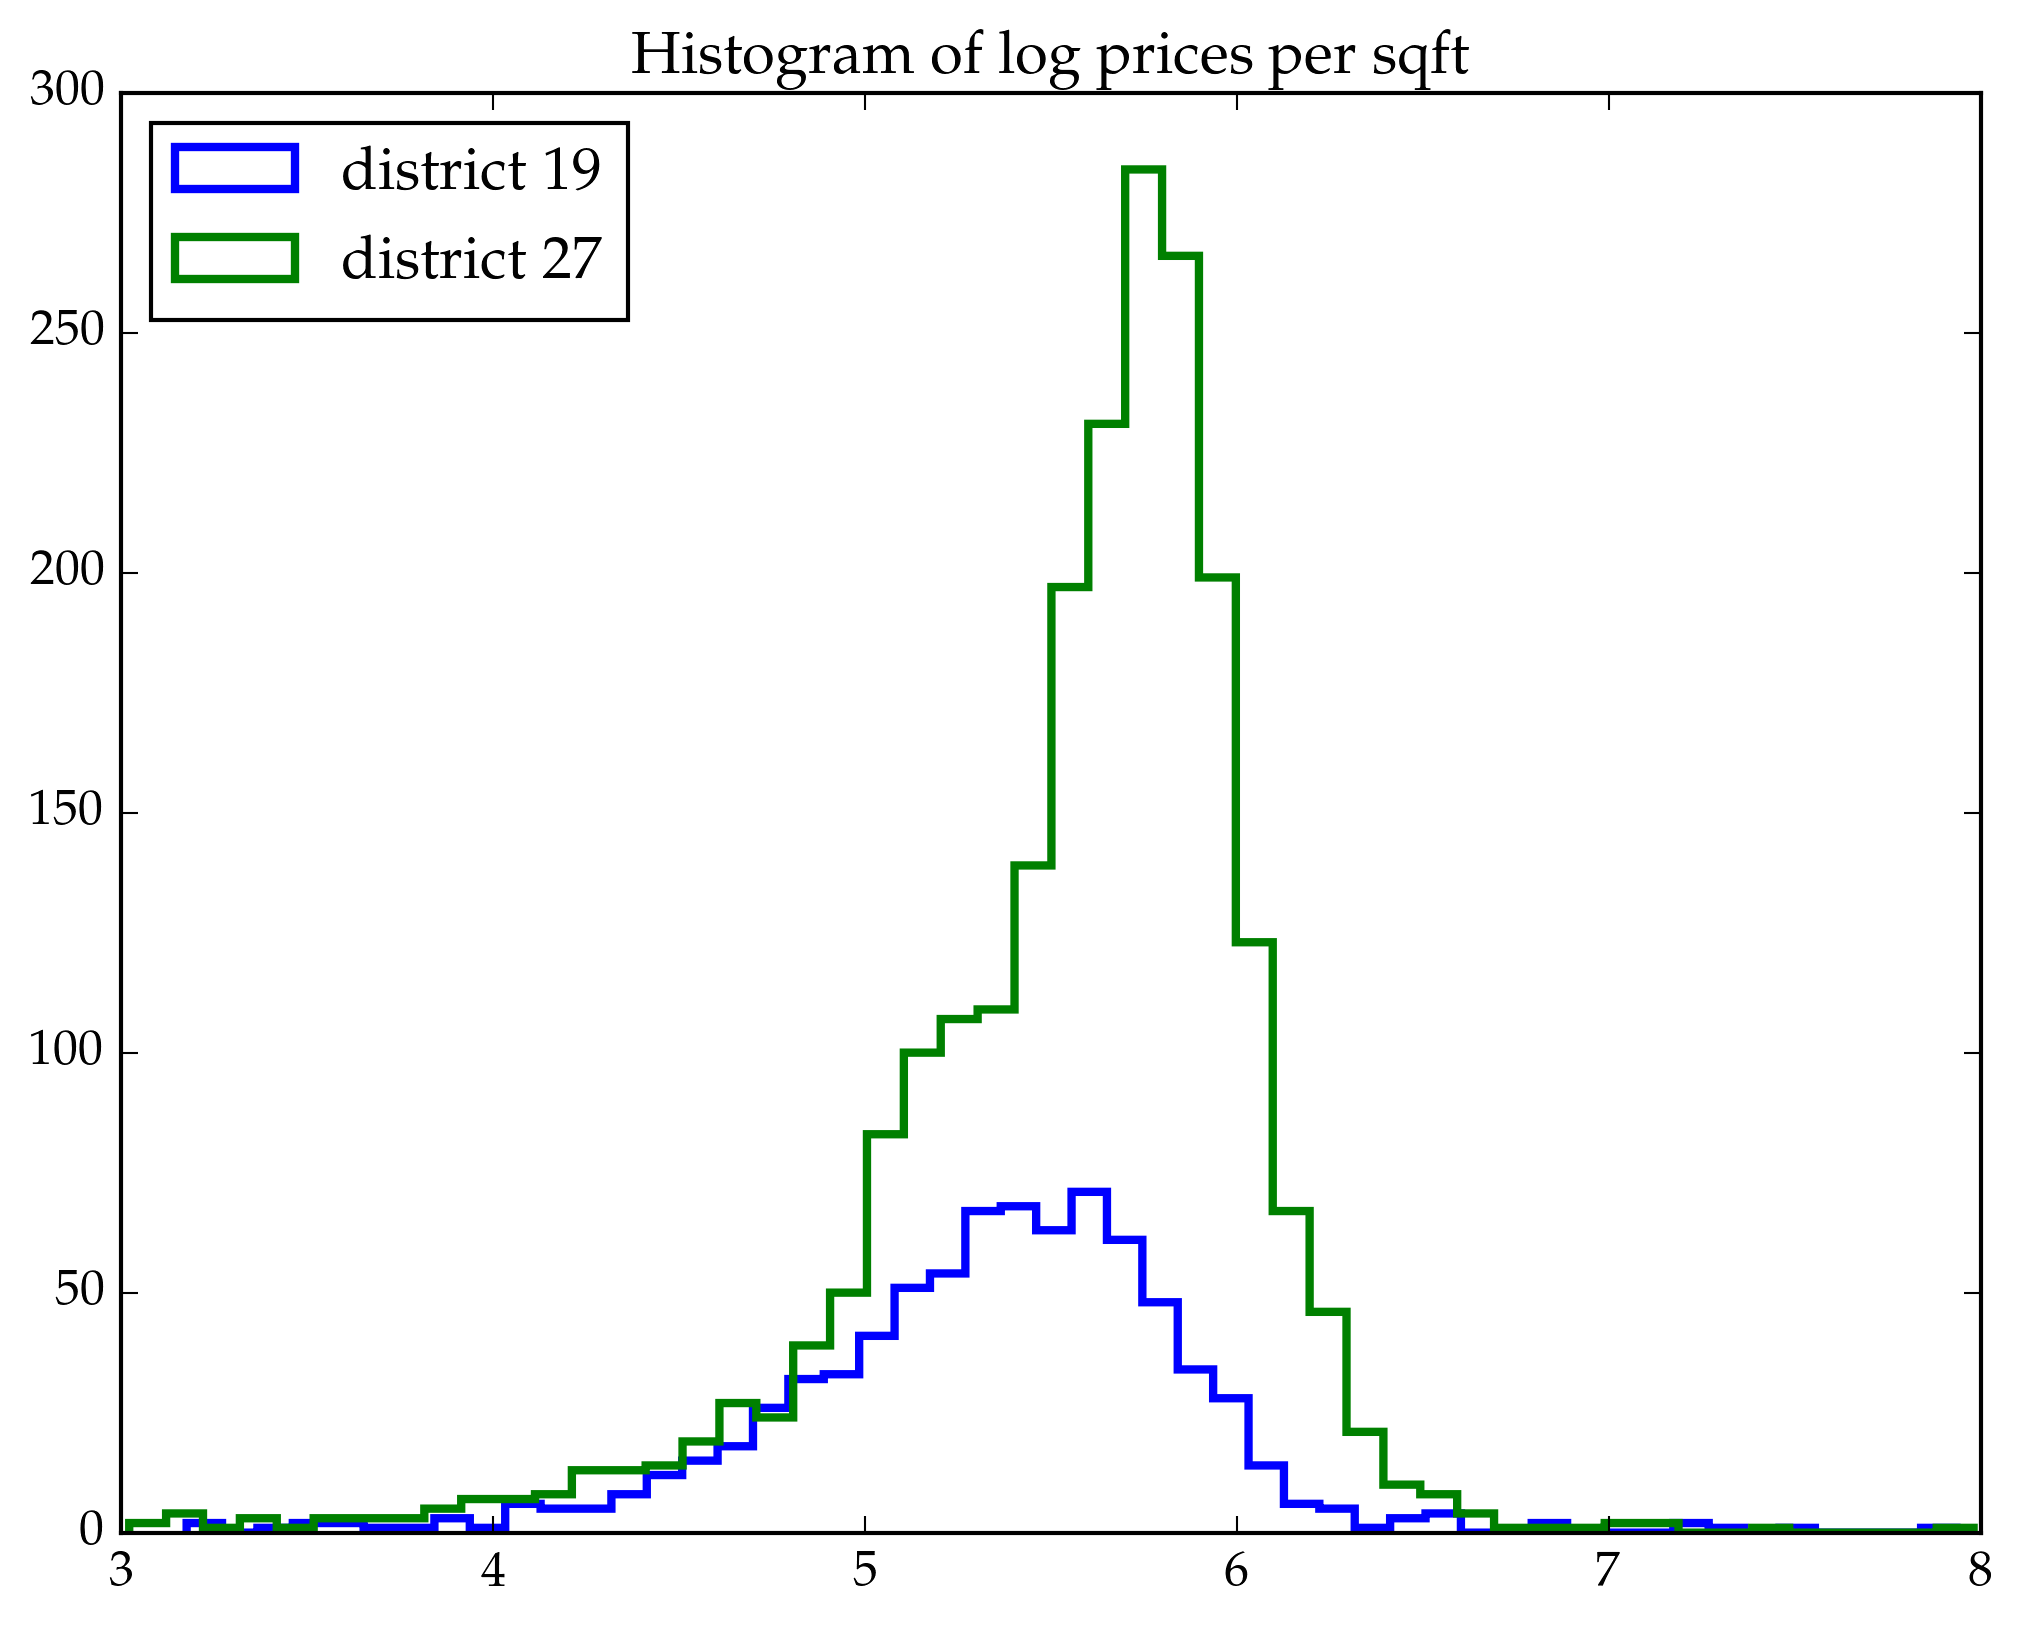

In [6]:
distrA = 19
distrB = 27
plt.plt[:hist](Y_dict[distrA],bins=50, histtype="step", label=@sprintf("district %d", distrA), linewidth=2)
plt.plt[:hist](Y_dict[distrB],bins=50, histtype="step", label=@sprintf("district %d", distrB), linewidth=2)
plt.title("Histogram of log prices per sqft")
plt.legend(loc="upper left")
;

In [7]:
contrasts_dict = Dict()
for (term,col) in eachcol(for_mm)
    DataFrames.is_categorical(col) || continue
    contrasts_dict[term] = DataFrames.FullDummyCoding()
end
mf=DataFrames.ModelFrame(logSalePricePerSQFT ~ BUILDING_CLASS_AT_TIME_OF_SALE + TAX_CLASS_AT_TIME_OF_SALE, 
    for_mm, 
    contrasts=contrasts_dict)
mm=ModelMatrix(mf)
p = size(mm,2)
D_=mm.m;

In [8]:
σβ = 1.0
βkern_ = GaussianProcesses.LinIso(log(σβ))
type GPCovars   
    m:: Mean                # Mean object
    k::Kernel               # Kernel object
    βkern::Kernel
    logNoise::Float64       # log standard deviation of observation noise
    
    # Observation data
    nobsv::Int              # Number of observations
    X::Matrix{Float64}      # Input observations
    y::Vector{Float64}      # Output observations
    D::Array{Float64,2}
    data::KernelData        # Auxiliary observation data (to speed up calculations)
    βdata::KernelData
    p::Int                  # Dimensions of covariates
    dim::Int                # Dimension of inputs
    
    # Auxiliary data
    cK::AbstractPDMat       # (k + exp(2*obsNoise))
    alpha::Vector{Float64}  # (k + exp(2*obsNoise))⁻¹y
    mLL::Float64            # Marginal log-likelihood
    dmLL::Vector{Float64}   # Gradient marginal log-likelihood

    function GPCovars(X::Matrix{Float64}, 
        y::Vector{Float64}, 
        D::Matrix{Float64},
        m::Mean, 
        k::Kernel,
        βkern::Kernel,
        logNoise::Float64=-1e8,
        )
        dim, nobsv = size(X)
        p, nobsv2 = size(D)
        nobsv == nobsv2 || throw(ArgumentError("X and D should have the same number of rows"))
        length(y) == nobsv || throw(ArgumentError("X and y should have the same number of rows"))
        gp = new(m, k, βkern, logNoise, nobsv, X, y, D, KernelData(k, X), KernelData(βkern, D), p, dim)
        update_mll!(gp)
        return gp
    end
end

In [9]:
function update_mll!(gp::GPCovars, cK::Matrix{Float64})
    μ = mean(gp.m, gp.X)
    cov!(cK, gp.βkern, gp.D, gp.βdata)
    addcov!(cK, gp.k, gp.X, gp.data)
    for i in 1:gp.nobsv
        cK[i,i] += max(exp(2*gp.logNoise),1e-8)
    end
    gp.cK = PDMat(cK)
    gp.alpha = gp.cK \ (gp.y .- μ)
    gp.mLL = -dot((gp.y-μ),gp.alpha)/2.0 - logdet(gp.cK)/2.0 - gp.nobsv*log(2π)/2.0
end
function update_mll!(gp::GPCovars)
    Σbuffer = Array(Float64, gp.nobsv, gp.nobsv)
    update_mll!(gp, Σbuffer)
end
function update_mll!!(gp::GPCovars)
    cK = gp.cK.mat
    μ = mean(gp.m, gp.X)
    cov!(cK, gp.βkern, gp.D, gp.βdata)
    addcov!(cK, gp.k, gp.X, gp.data)
    for i in 1:gp.nobsv
        cK[i,i] += max(exp(2*gp.logNoise),1e-8)
    end
    chol_buffer = gp.cK.chol.factors
    copy!(chol_buffer, cK)
    chol = cholfact!(Symmetric(chol_buffer))
    gp.cK = PDMats.PDMat(cK, chol)
    gp.alpha = gp.cK \ (gp.y - μ)
    gp.mLL = -dot((gp.y - μ),gp.alpha)/2.0 - logdet(gp.cK)/2.0 - gp.nobsv*log(2π)/2.0 # Marginal log-likelihood
end
function get_ααinvcKI!(ααinvcKI::Matrix, cK::AbstractPDMat, α::Vector)
    nobsv = length(α)
    size(ααinvcKI) == (nobsv, nobsv) || throw(ArgumentError, 
                @sprintf("Buffer for ααinvcKI should be a %dx%d matrix, not %dx%d",
                         nobsv, nobsv,
                         size(ααinvcKI,1), size(ααinvcKI,2)))
    ααinvcKI[:,:] = 0.0
    @inbounds for i in 1:nobsv
        ααinvcKI[i,i] = -1.0
    end
    A_ldiv_B!(cK.chol, ααinvcKI)
    LinAlg.BLAS.ger!(1.0, α, α, ααinvcKI)
end
""" Update gradient of marginal log-likelihood """
function update_mll_and_dmll!(gp::GPCovars,
    Kgrad::Matrix{Float64},
    ααinvcKI::Matrix{Float64}
    ; 
    noise::Bool=true, # include gradient component for the logNoise term
    mean::Bool=true, # include gradient components for the mean parameters
    kern::Bool=true, # include gradient components for the spatial kernel parameters
    beta::Bool=true, # include gradient components for the linear regression prior terms
    )
    update_mll!!(gp)
    n_mean_params = num_params(gp.m)
    n_kern_params = num_params(gp.k)
    n_beta_params = num_params(gp.βkern)
    gp.dmLL = Array(Float64, noise + mean*n_mean_params + kern*n_kern_params + beta*n_beta_params)
    logNoise = gp.logNoise
    get_ααinvcKI!(ααinvcKI, gp.cK, gp.alpha)
    i=1
    if noise
        gp.dmLL[i] = exp(2.0*logNoise)*trace(ααinvcKI)
        i+=1
    end
    if mean
        Mgrads = grad_stack(gp.m, gp.X)
        for j in 1:n_mean_params
            gp.dmLL[i] = dot(Mgrads[:,j],gp.alpha)
            i += 1
        end
    end
    if kern
        for iparam in 1:n_kern_params
            grad_slice!(Kgrad, gp.k, gp.X, gp.data, iparam)
            gp.dmLL[i] = dot(Kgrad,ααinvcKI)/2.0
            i+=1
        end
    end
    if beta
        for iparam in 1:n_beta_params
            grad_slice!(Kgrad, gp.βkern, gp.D, gp.βdata, iparam)
            gp.dmLL[i] = vecdot(ααinvcKI,Kgrad)/2.0
            i+=1
        end
    end
end
function set_params!(gp::GPCovars, hyp::Vector{Float64}; 
                    noise::Bool=true, mean::Bool=true, kern::Bool=true, beta::Bool=true)
    i=1
    if noise
        gp.logNoise = hyp[i]
        i+=1
    end
    if mean
        set_params!(gp.m, hyp[i:i+num_params(gp.m)-1])
        i+=num_params(gp.m)
    end
    if kern
        set_params!(gp.k, hyp[i:i+num_params(gp.k)-1])
        i+=num_params(gp.k)
    end
    if beta
        set_params!(gp.βkern, hyp[i:i+num_params(gp.βkern)-1])
        i+=num_params(gp.βkern)
    end
end
function get_params(gp::GPCovars; noise::Bool=true, mean::Bool=true, kern::Bool=true, beta::Bool=true)
    params = Float64[]
    if noise; push!(params, gp.logNoise); end
    if mean;  append!(params, get_params(gp.m)); end
    if kern; append!(params,  get_params(gp.k)); end
    if beta; append!(params,  get_params(gp.βkern)); end
    return params
end
function optimize!(gp::GPCovars; noise::Bool=true, mean::Bool=true, kern::Bool=true, beta::Bool=true, 
                    method=ConjugateGradient(), kwargs...)
    Kgrad_buffer = Array(Float64, gp.nobsv, gp.nobsv)
    ααinvcKI = Array(Float64, gp.nobsv, gp.nobsv)
    function mll(hyp::Vector{Float64})
        try
            set_params!(gp, hyp; noise=noise, mean=mean, kern=kern, beta=beta)
            update_mll!!(gp)
            return -gp.mLL
        catch err
             if !all(isfinite(hyp))
                println(err)
                return Inf
            elseif isa(err, ArgumentError)
                println(err)
                return Inf
            elseif isa(err, Base.LinAlg.PosDefException)
                println(err)
                return Inf
            else
                throw(err)
            end
        end        
    end

    function mll_and_dmll!(hyp::Vector{Float64}, grad::Vector{Float64})
        try
            set_params!(gp, hyp; noise=noise, mean=mean, kern=kern, beta=beta)
            update_mll_and_dmll!(gp, Kgrad_buffer, ααinvcKI; noise=noise, mean=mean, kern=kern, beta=beta)
            grad[:] = -gp.dmLL
            return -gp.mLL
        catch err
             if !all(isfinite(hyp))
                println(err)
                return Inf
            elseif isa(err, ArgumentError)
                println(err)
                return Inf
            elseif isa(err, Base.LinAlg.PosDefException)
                println(err)
                return Inf
            else
                throw(err)
            end
        end 
    end
    function dmll!(hyp::Vector{Float64}, grad::Vector{Float64})
        mll_and_dmll!(hyp::Vector{Float64}, grad::Vector{Float64})
    end

    func = DifferentiableFunction(mll, dmll!, mll_and_dmll!)
    init = get_params(gp;  noise=noise, mean=mean, kern=kern, beta=beta)  # Initial hyperparameter values
    results=optimize(func,init; method=method, kwargs...)                     # Run optimizer
    set_params!(gp, results.minimum; noise=noise, mean=mean, kern=kern, beta=beta)
    return results
end
;

# Optimize hyperparameters using district 27

I start by optimizing the hyperparameters $\beta_0$, $\sigma_\beta$, $\sigma_f$, $\scrl$ and $\sigma_y$ using only data for district 27 (the larger of the two, with {{length(Y_dict[27])}} sales. Optimizing within a single district makes it computationally quicker and easier to implement, and ensures that there is no interference from the treatment effect.

In [11]:
district=27 # bigger district of the two
# GP_dict=Dict{String, GP}()
σf = 0.2
σy = 0.2
L = 1300.0
_kern = SEIso(log(L), log(σf))
_logNoise = log(σy)
_X = X_dict[district]'
_Y = Y_dict[district]
_Dd = D_[schdistr_indices[district],:]'
_m = MeanConst(mean(_Y))
gp=GPCovars(_X, _Y, _Dd, _m, _kern, βkern_, _logNoise)
;

The optimization takes a very reasonable 20-30 seconds.

In [12]:
@time opt_out=optimize!(gp, iterations=10, x_tol=1e-4, f_tol=1e-3);

 19.636627 seconds (6.27 M allocations: 334.787 MB, 2.31% gc time)


In [13]:
opt_out

Results of Optimization Algorithm
 * Algorithm: Conjugate Gradient
 * Starting Point: [-1.6094379124341003,5.560919115673984, ...]
 * Minimizer: [-0.8487823942160716,5.5608570663288095, ...]
 * Minimum: 1.379086e+03
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 1.0e-04: false
   * |f(x) - f(x')| / |f(x)| < 1.0e-03: true
   * |g(x)| < 1.0e-08: false
   * Reached Maximum Number of Iterations: false
 * Objective Function Calls: 32
 * Gradient Calls: 25

The fitted hyperparameters are:

| Parameter      | Fitted Value                             |
|----------------|------------------------------------------|
| $\sigma_y$     | {{@sprintf("%.4f", exp(gp.logNoise))}} |
| $\sigma_f$     | {{@sprintf("%.4f", √(gp.k.σ2))}}        |
| $\sigma_\beta$ | {{@sprintf("%.4f", 1/√gp.βkern.ℓ2)}}   |
| $\scrl$ (feet)   | {{@sprintf("%.4f", √(gp.k.ℓ2))}}       |

In [18]:
# @printf("σ_y: %.4f\n", exp(gp.logNoise))
# @printf("σ_f: %.4f\n", √(gp.k.σ2))
# @printf("σ_β: %.4f\n", 1/√gp.βkern.ℓ2)
# @printf("ℓ: %.4f\n", √(gp.k.ℓ2))

# Get posterior mean $\hat\beta$

With these hyperparameters in hand, I extract the posterior mean of the linear regression parameters $\beta_{1j}$ and $\beta_{2j}$, again only using district 27 data. This makes our lives easier, and I've convinced myself in other examples that it makes very little difference.

In [19]:
function get_ΣYβ!(gp::GPCovars)
    Σ = cov(gp.k, gp.X, gp.data)
    for i in 1:gp.nobsv
        Σ[i,i] += max(exp(2*gp.logNoise),1e-8)
    end
    return PDMats.PDMat(Σ)
end
;

Obtaining the posterior means is pretty quick, about 0.5 seconds.

In [20]:
@time ΣY_β = get_ΣYβ!(gp);

  0.516333 seconds (510.75 k allocations: 97.418 MB, 5.37% gc time)


In [21]:
tmp = PDMats.X_invA_Xt(ΣY_β, gp.D)
for i in 1:p
    tmp[i,i] += gp.βkern.ℓ2
end
m = mean(gp.m,gp.X)
βhat = (tmp \ gp.D) * (ΣY_β \ (gp.y.-m))
βhat_dict=Dict(zip(coefnames(mf), βhat))
;

# Fit GPs to residuals

I then go back to the other school districts, obtain their residuals from the linear regression, and fit $\GP$'s to the residuals (using the hyperparameter values fitted on district 27), with constant mean set to the mean of the residuals. I then look at the boundary between districts 19 and 27, using our machinery to obtain a treatment effect cliff face, and an inverse-variance weighted average.

In [22]:
resid = for_mm[:logSalePricePerSQFT].values - D_*βhat
resid_dict=Dict{Int, Vector{Float64}}()
for name in schdistrs
    resid_dict[name] = resid[schdistr_indices[name]]
end

In [23]:
resid_GP_dict=Dict{Int, GP}()
for name in schdistrs
    X = X_dict[name]
    if size(X,1)==0
        continue
    end
    Y = resid_dict[name]
    fit = GP(X', Y, MeanConst(mean(Y)), gp.k, gp.logNoise)
    resid_GP_dict[name] = fit
end

In [39]:
distrA,distrB=19,27
X◫ = hcat(sentinels[distrA,distrB].coordinates...)
n◫ = size(X◫, 2)
resid_pred_A = GaussianProcesses.predict(resid_GP_dict[distrA], X◫; full_cov=true)
resid_pred_B = GaussianProcesses.predict(resid_GP_dict[distrB], X◫; full_cov=true)
resid_μposterior = resid_pred_A[1].-resid_pred_B[1]
resid_Σposterior = resid_pred_A[2]+resid_pred_B[2]
;

For context, here is a plot of my sentinel points between the two districts. The districts are on the coastline, so some of the boundary runs in the water, and then there's some sentinels on an island in Jamaica Bay. In the treatment effect cliff face that follows, we see a corresponding discontinuous jump in $\tau(x)$ and its posterior variance.

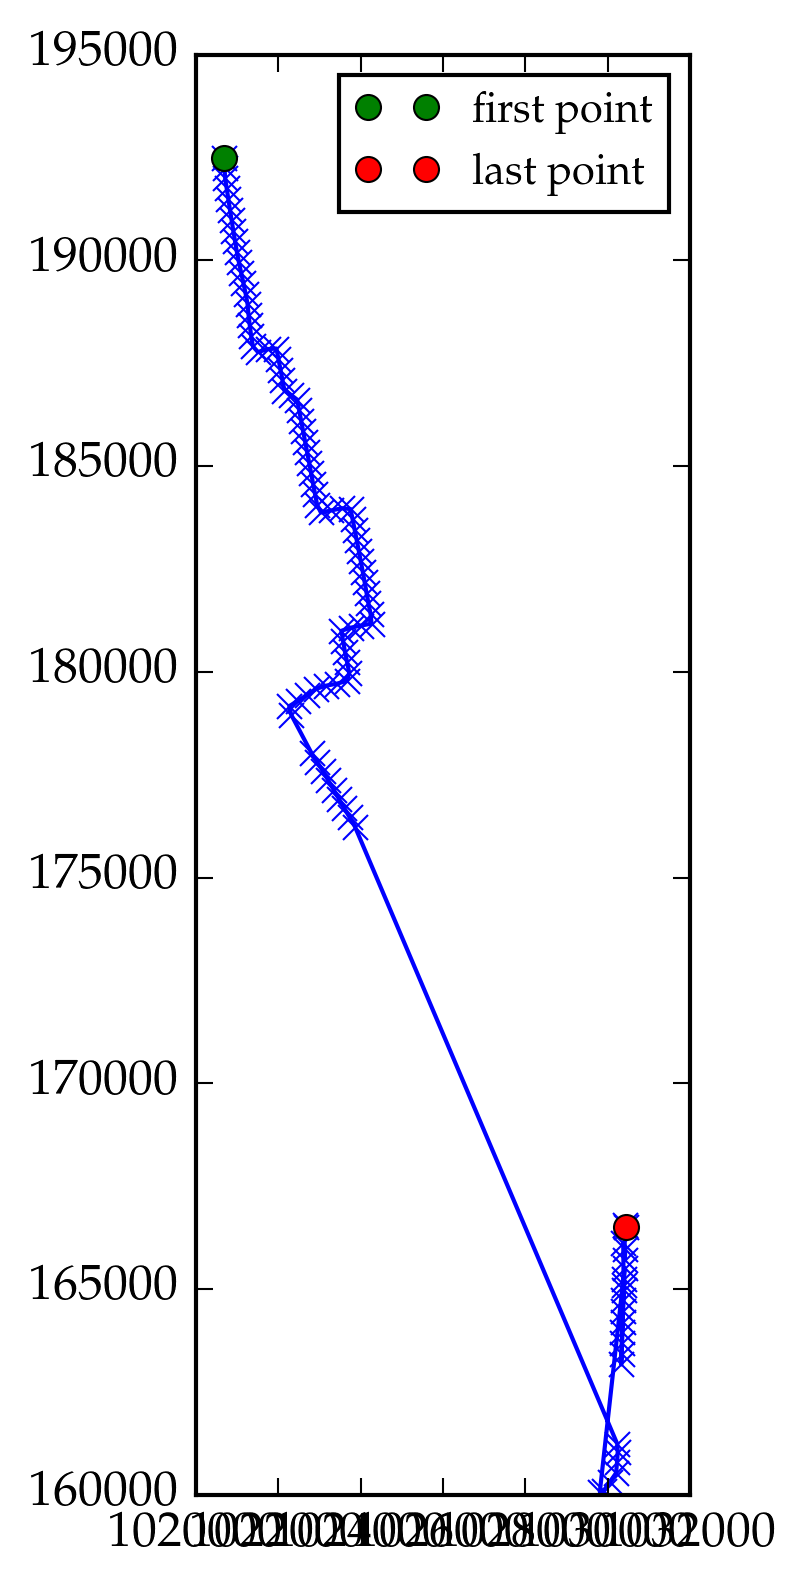

In [40]:
plt.plot(X◫[1,:], X◫[2,:], "-x")
plt.plot(X◫[1,1], X◫[2,1], "o", color="green", label="first point")
plt.plot(X◫[1,end], X◫[2,end], "o", color="red", label="last point")
plt.legend(loc="best", fontsize="small")
plt.gca()[:set_aspect]("equal")

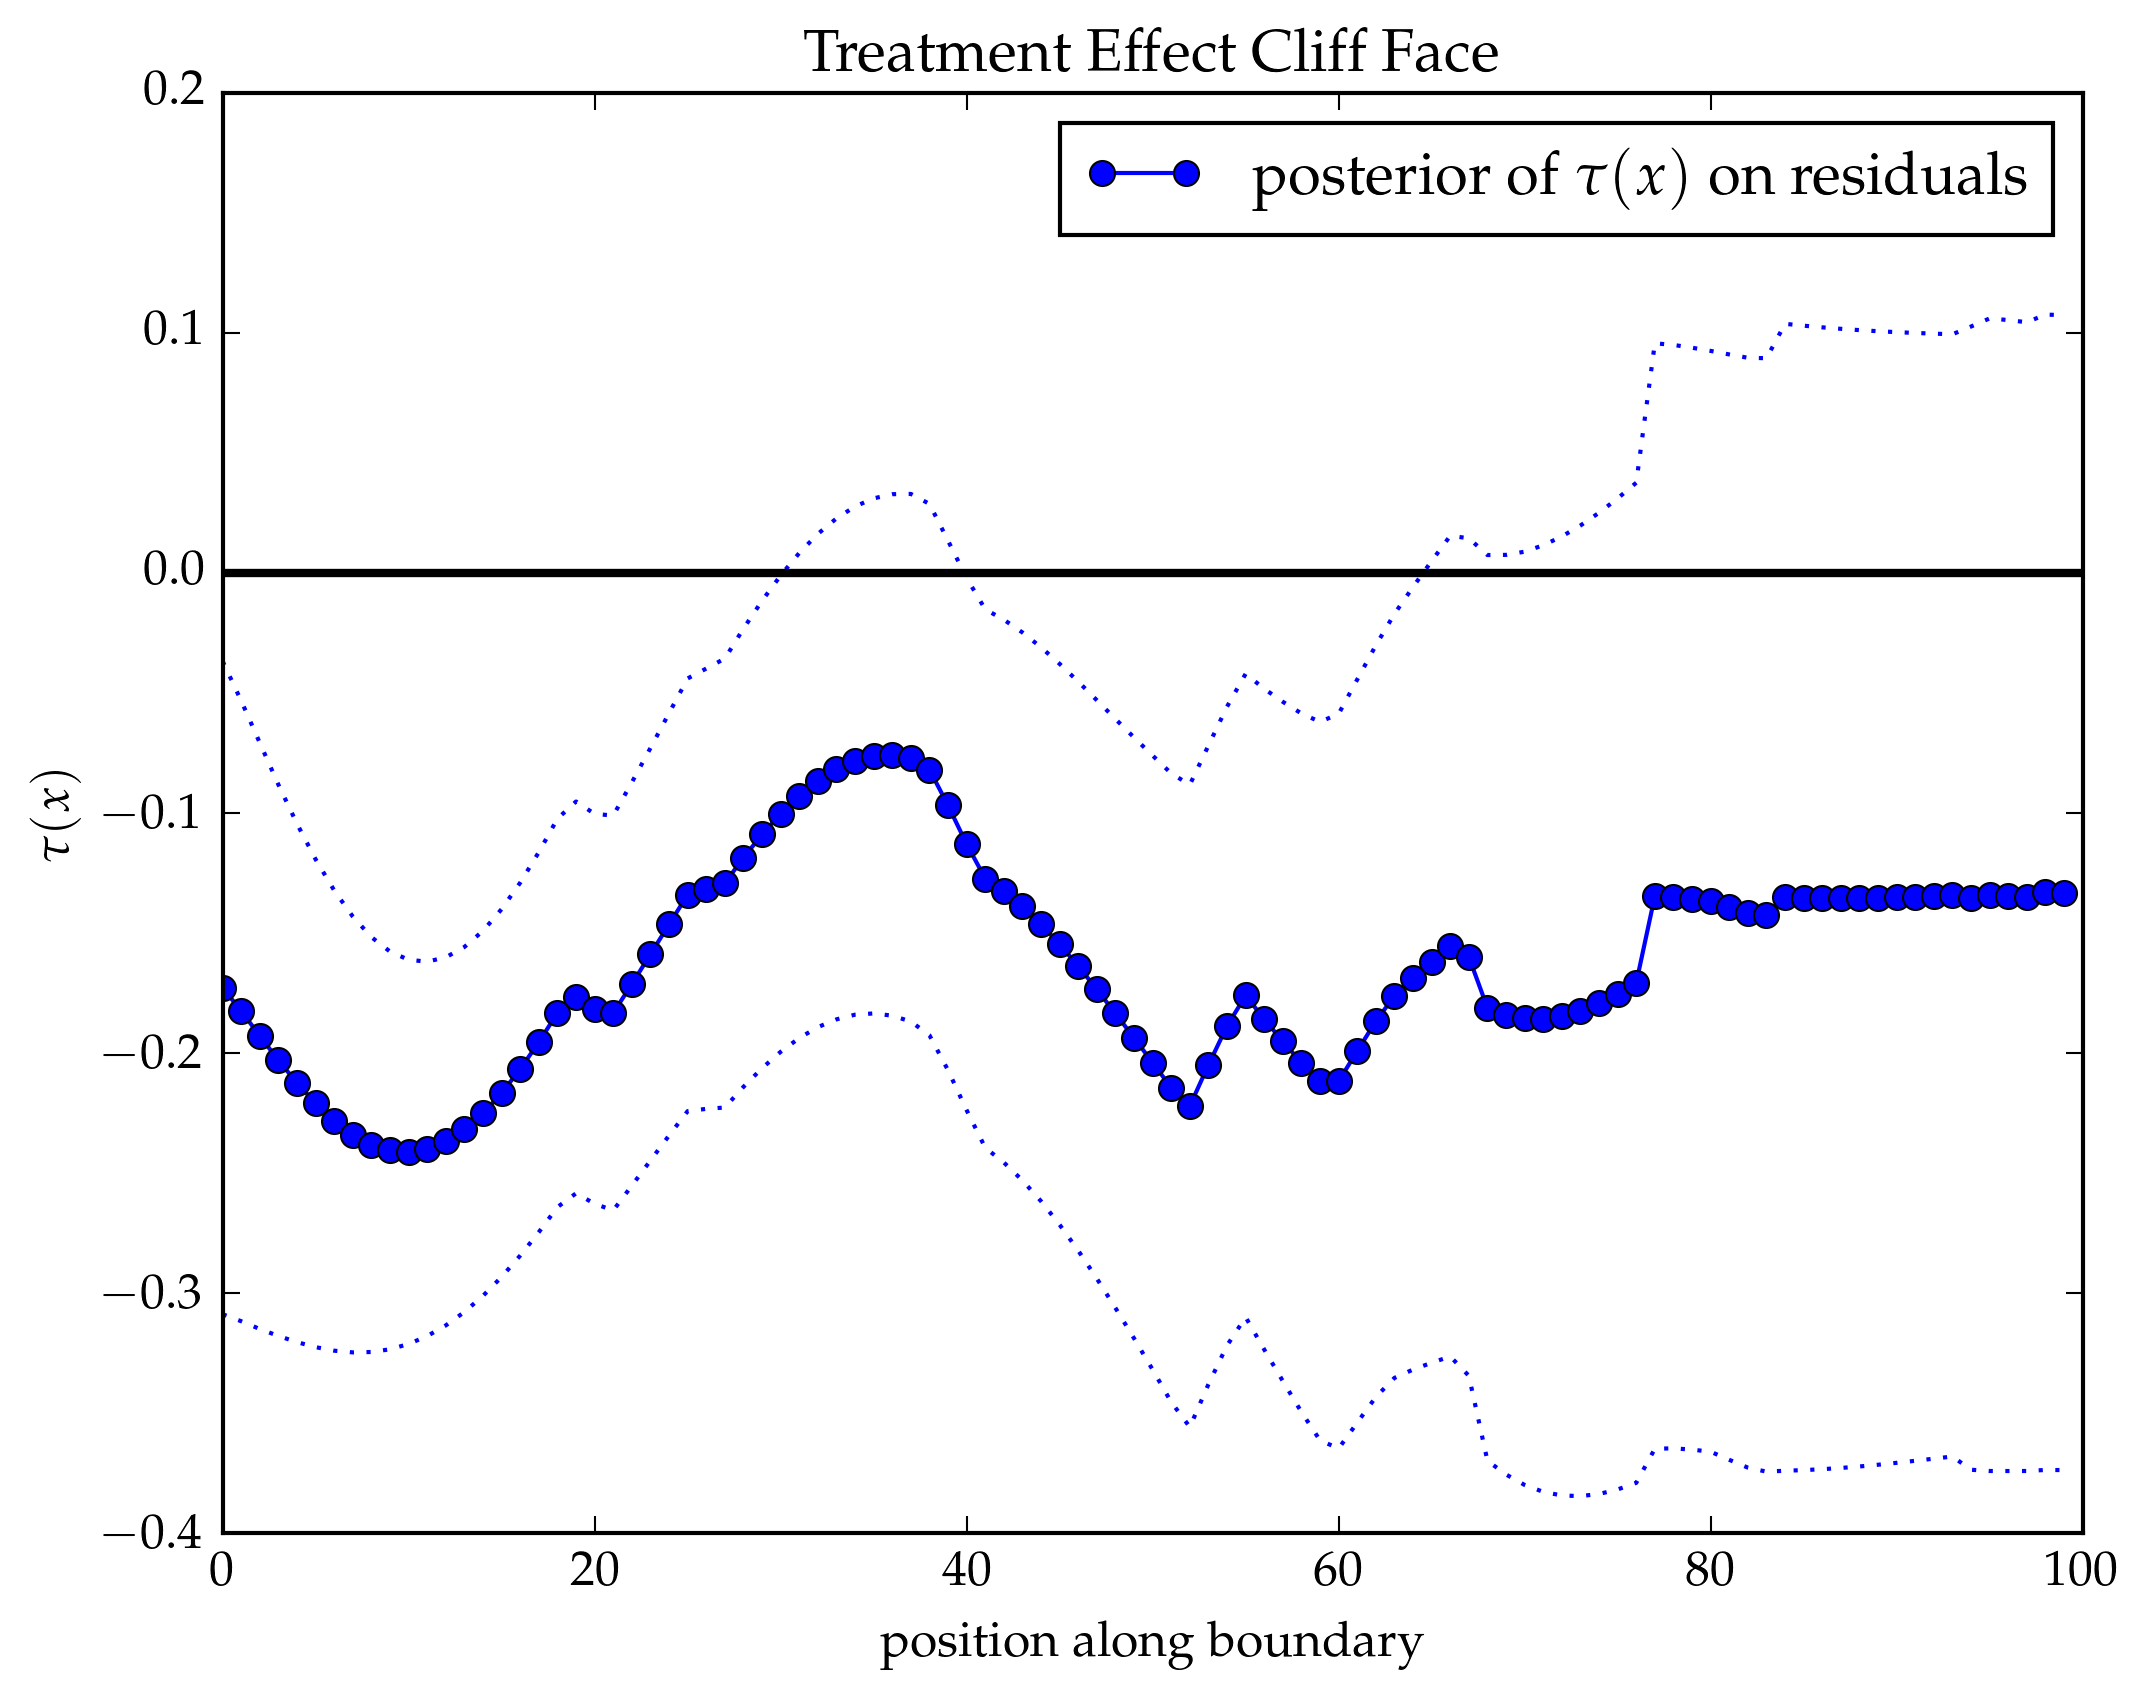

In [41]:
PyPlot.plt[:interactive](true)
plt.title("Treatment Effect Cliff Face")
PyPlot.plt[:interactive](false)
plt.plot(resid_μposterior, color="blue", "-o", label=L"posterior of $\tau(x)$ on residuals")
plt.plot(resid_μposterior.+√diag(resid_Σposterior), color="blue", linestyle=":")
plt.plot(resid_μposterior.-√diag(resid_Σposterior), color="blue", linestyle=":")
plt.axhline(y=0, color="black", linewidth=2)
plt.ylabel(L"\tau(x)")
plt.xlabel("position along boundary")
plt.legend()
PyPlot.plt[:interactive](true)
;

The following plot just shows the posterior standard deviation against the latitude of the sentinel points (the Northmost sentinel point is on the right of this plot, so it's horizontally flipped from the cliff face plot above). We see that the standard deviation is lowest in the most densely populated part of the boundary, and very high on the island.

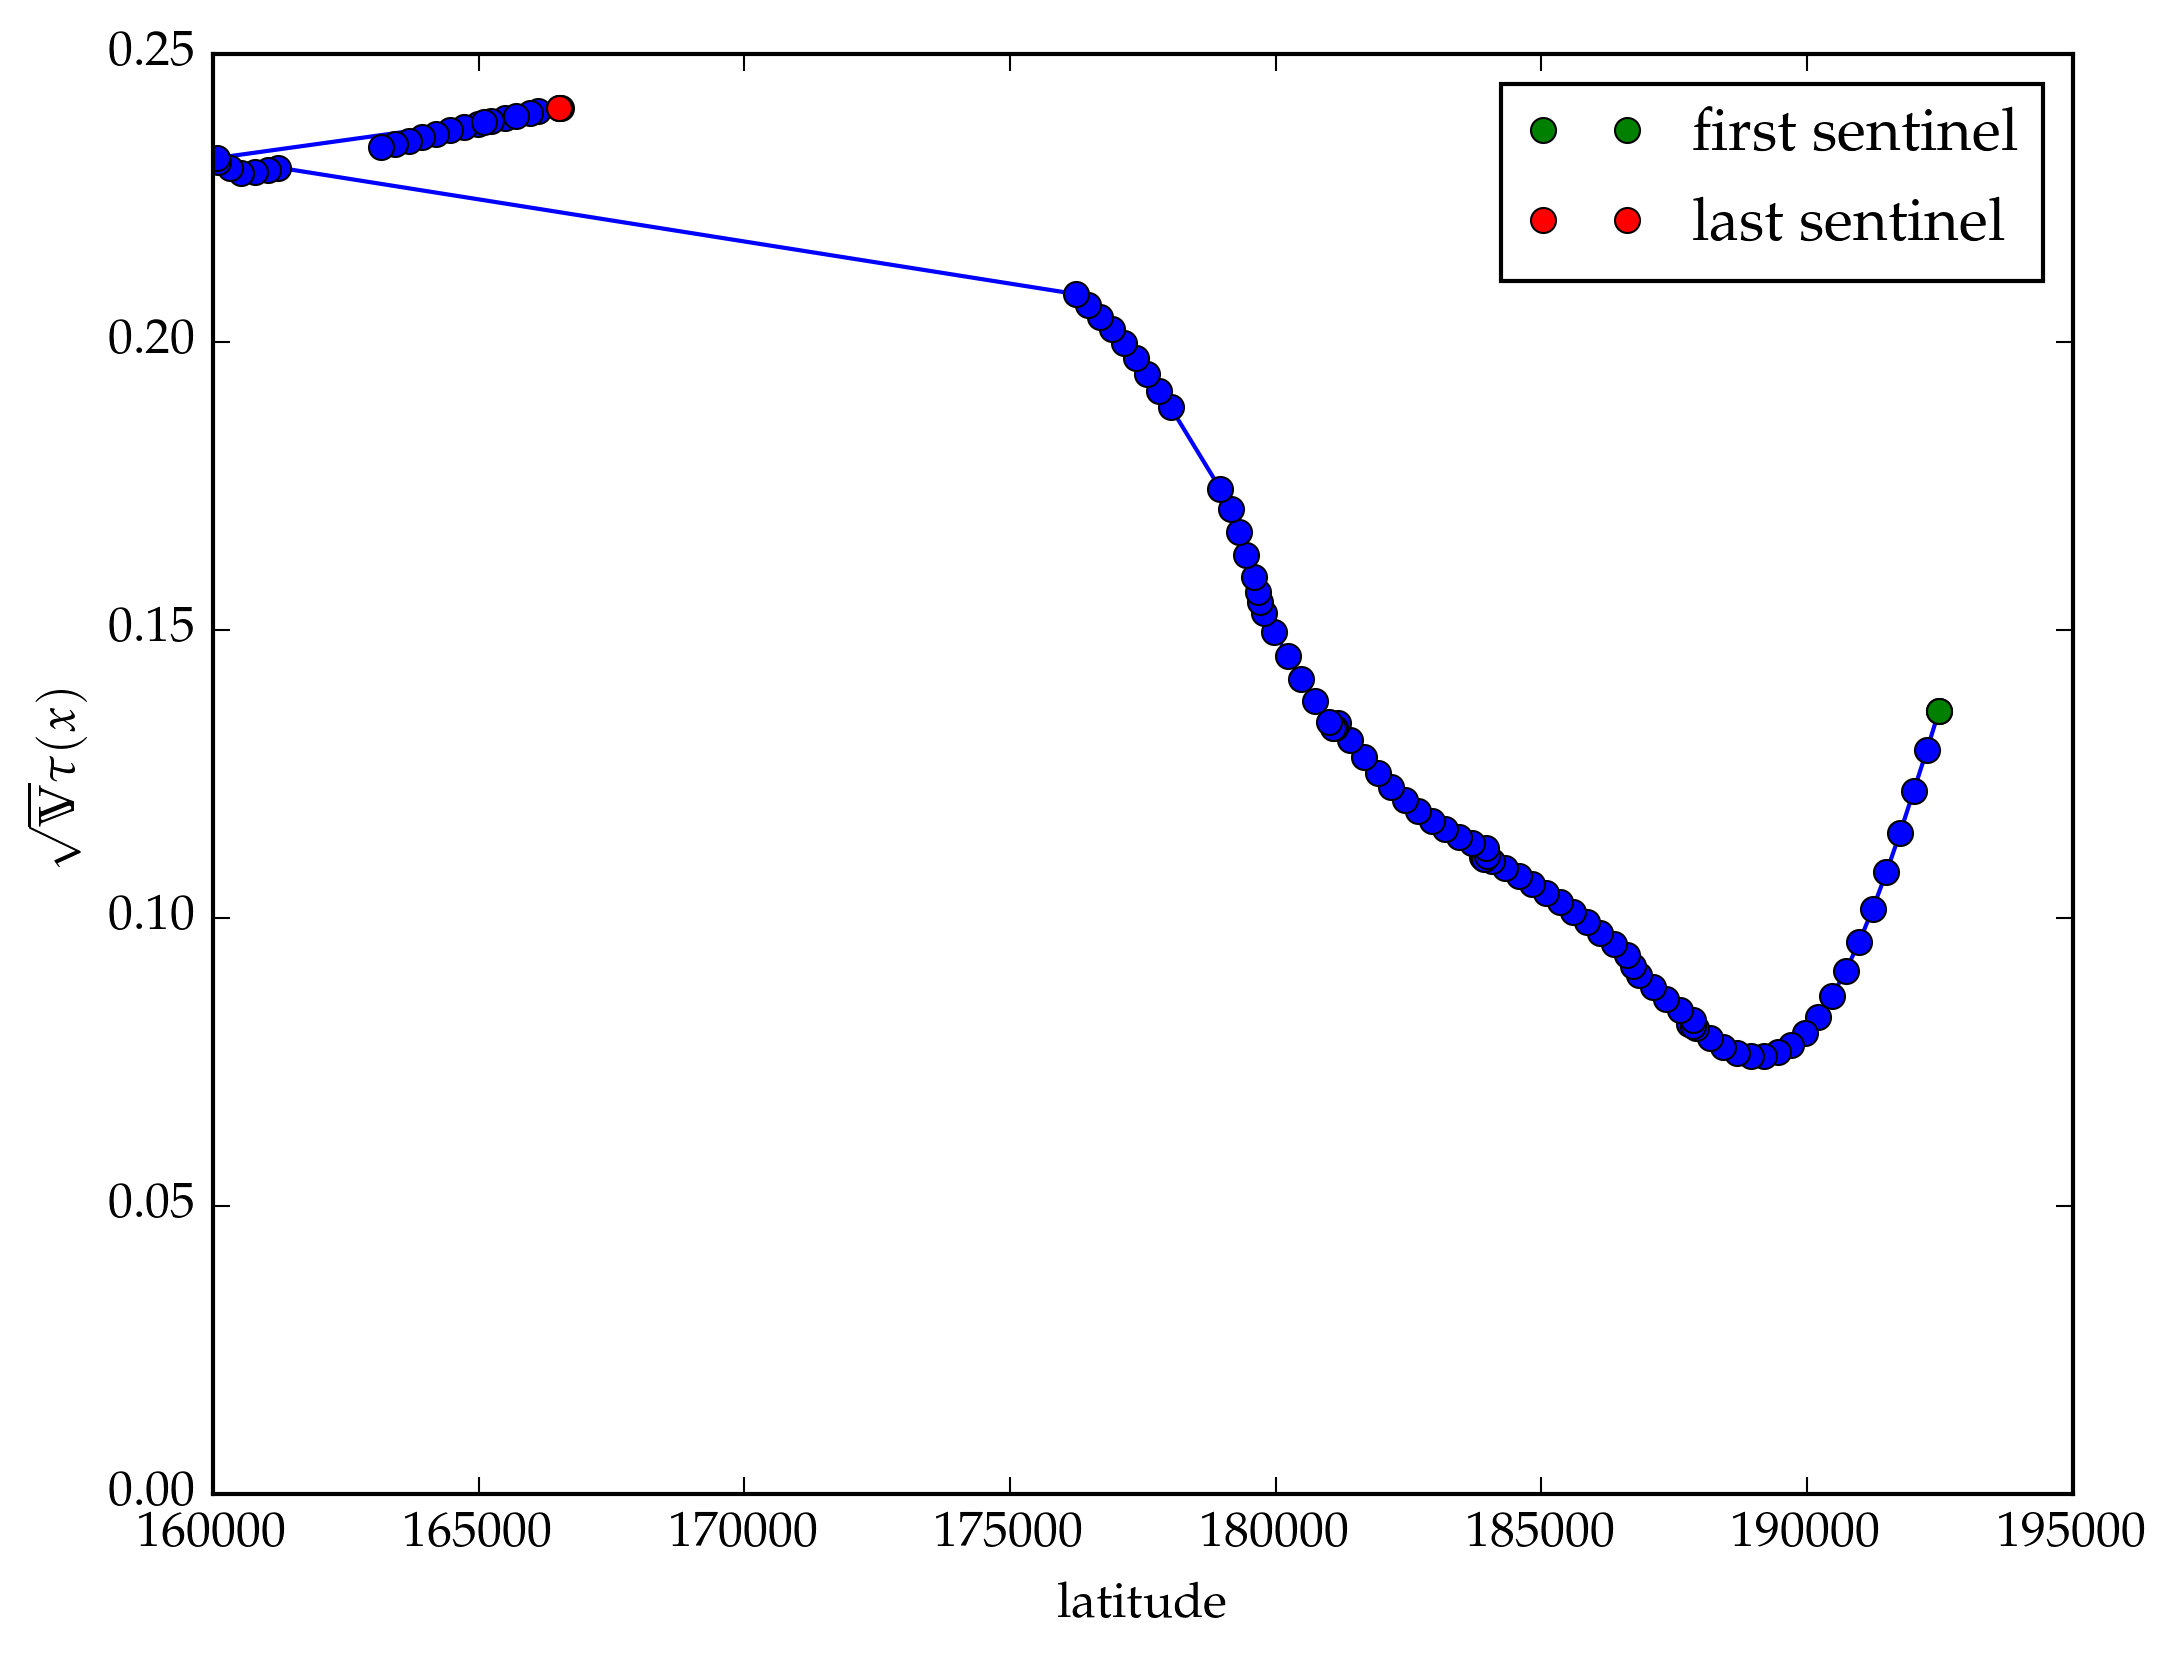

In [42]:
plt.plot(X◫[2,:], √diag(resid_Σposterior), "-o")
plt.plot(X◫[2,1], √diag(resid_Σposterior)[1], color="green", "o", label="first sentinel")
plt.plot(X◫[2,end], √diag(resid_Σposterior)[end], color="red", "o", label="last sentinel")
plt.ylim(0)
plt.xlabel("latitude")
plt.ylabel(L"\sqrt\mathbb{V}\tau(x)")
plt.legend(loc="best")
;

The inverse-variance treatment effect is very strong, we get:
\begin{align}
    \tau &\mid Y \sim \normal\del{\mu=-0.174, \sigma=0.049} \\
    \Pr\del{\tau>0 \mid Y} &= 0.022\%
\end{align}

In [43]:
n◫ = size(X◫)[2]
denom_weighted = dot(ones(n◫),(resid_Σposterior \ ones(n◫)))
τhat_weighted = sum(resid_Σposterior\resid_μposterior) / denom_weighted
Vτhat_weighted = 1/denom_weighted
τpost=Normal(τhat_weighted, √Vτhat_weighted)
@printf("τ|Y ∼ Normal(μ=%.3f, σ=%.3f)\n", mean(τpost), std(τpost))
@printf("P(τ>0|Y) = %.3f%%", ccdf(τpost, 0.0)*100)

τ|Y ∼ Normal(μ=-0.174, σ=0.049)
P(τ>0|Y) = 0.022%

In [30]:
# mean(Y_dict[distrA])-mean(Y_dict[distrB])

# Pairwise treatment effect

Beyond districts 19 and 27, I now look at every pair of contiguous NYC school districts, and compute the inverse-variance treatment effect. I then draw a map of all the district boundaries with the thickness of the boundaries drawn proportionally to the effect size $\E \tau/\sqrt{\V\tau}$. Boundaries with $\tau$ at least two standard deviations away from 0 are shown in black.

In [31]:
function get_τpost(gp_i::GP, gp_j::GP, sentinelX::Matrix)
    n◫ = size(sentinelX, 2)
    resid_pred_A = GaussianProcesses.predict(gp_i, sentinelX; full_cov=true)
    resid_pred_B = GaussianProcesses.predict(gp_j, sentinelX; full_cov=true)
    resid_μposterior = resid_pred_A[1].-resid_pred_B[1]
    resid_Σposterior = resid_pred_A[2]+resid_pred_B[2]
    
    denom_weighted = dot(ones(n◫),(resid_Σposterior \ ones(n◫)))
    τhat_weighted = sum(resid_Σposterior\resid_μposterior) / denom_weighted
    Vτhat_weighted = 1.0/denom_weighted
    τpost=Normal(τhat_weighted, √Vτhat_weighted)
    return τpost
end 
;

In [44]:
# get_τpost(resid_GP_dict[distrA], resid_GP_dict[distrB], hcat(sentinels[distrA,distrB].coordinates...))

In [33]:
τpost_pairs = Dict{Tuple{Int64,Int64},Normal}()
for (distrA,distrB) in keys(sentinels)
    X◫ = hcat(sentinels[distrA,distrB].coordinates...)
    τpost = get_τpost(resid_GP_dict[distrA], resid_GP_dict[distrB], X◫)
    τpost_pairs[distrA,distrB] = τpost
end

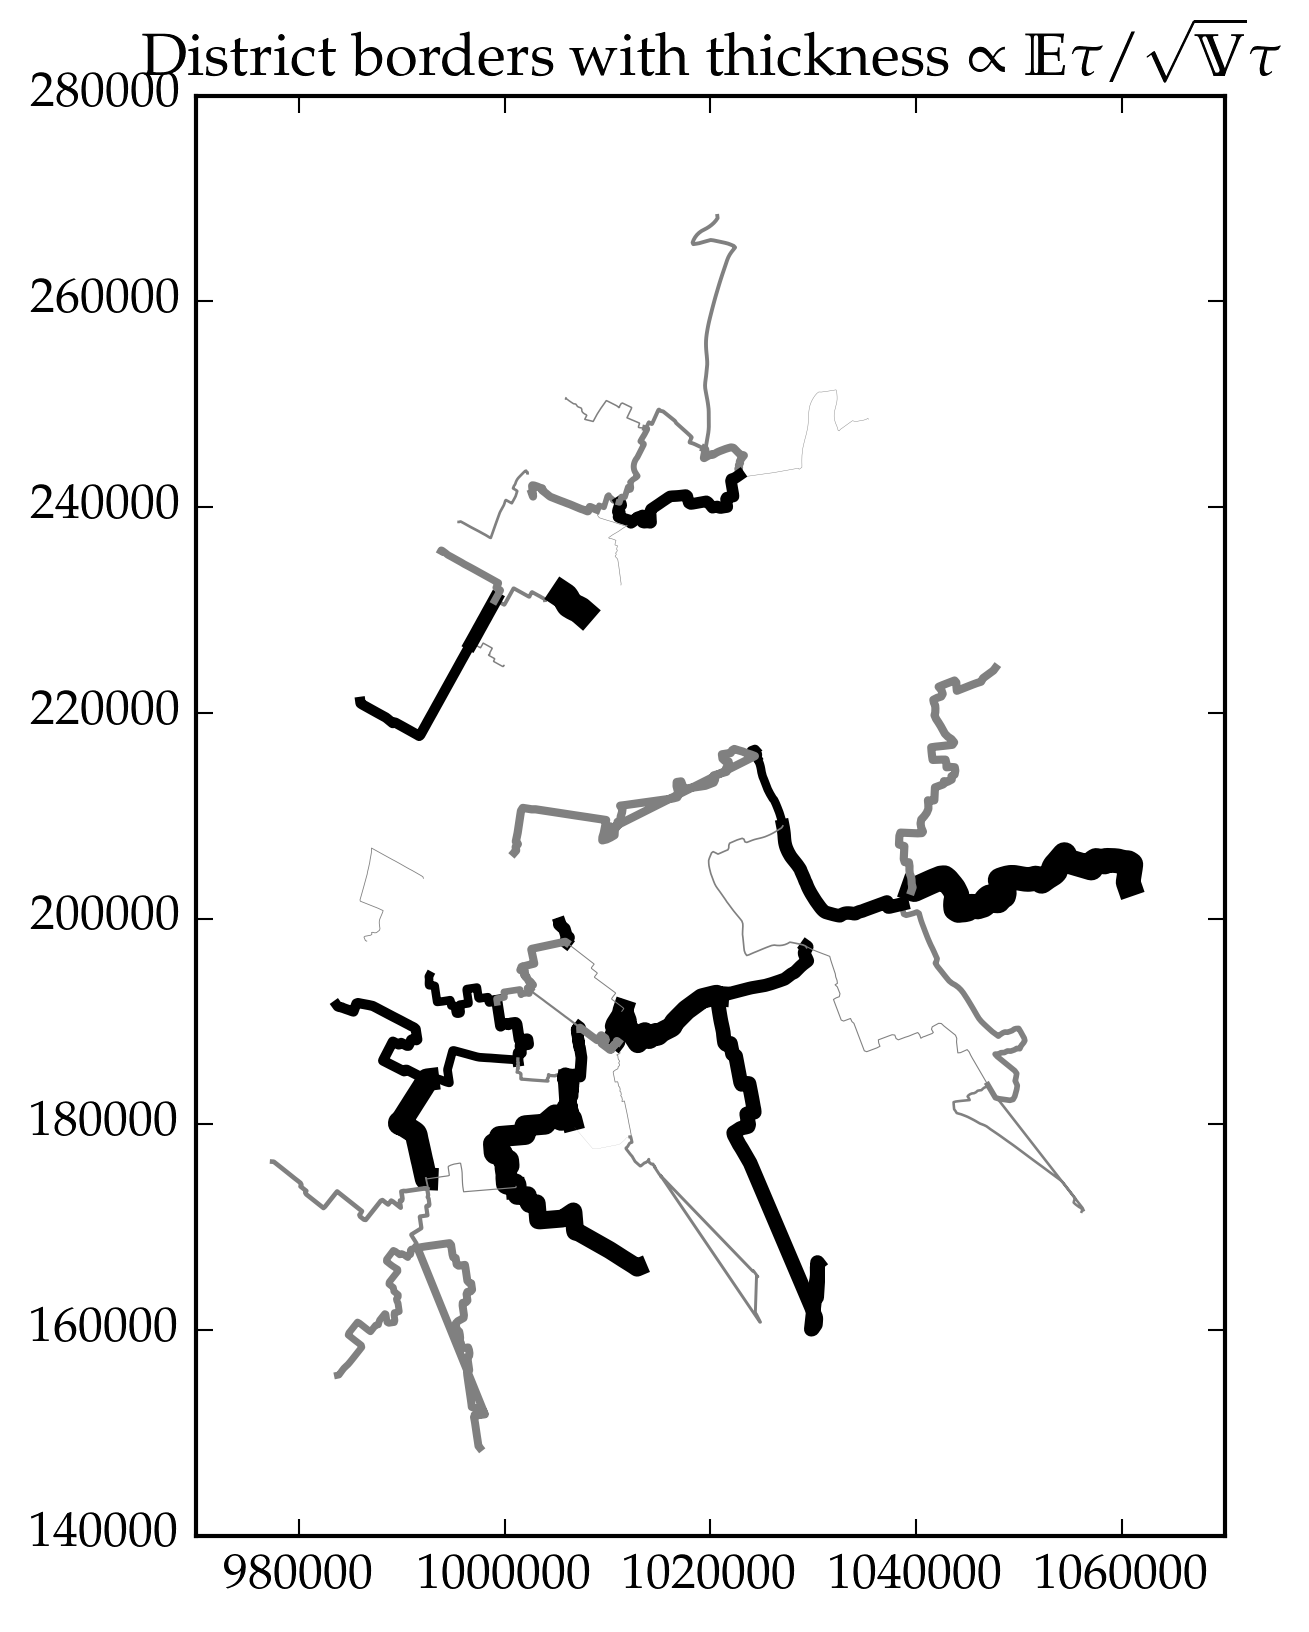

In [34]:
for distr_pair in keys(sentinels)
    distrA, distrB = distr_pair
    if distrA > distrB
        continue
    end
    X◫ = hcat(sentinels[distr_pair].coordinates...)
    
    center_A = mean(X_dict[distrA],1)
    center_A = mean(X_dict[distrB],1)
    center_X◫ = mean(X◫, 1)
    arrow_A = 
    X_towards_A = 
    
    τpost = τpost_pairs[distr_pair]
    eff_size = abs(mean(τpost)) / std(τpost)
    if eff_size > 2
        color="black"
    else
        color="gray"
    end
    plt.plot(X◫[1,:], X◫[2,:], linewidth=eff_size, color=color)
end
plt.gca()[:set_aspect]("equal")
plt.title(L"District borders with thickness $\propto \mathbb{E}\tau/{\sqrt\mathbb{V}\tau}$ ")
;

# Next steps

* Fit hyperparameters on more districts than just the 27th
* Decide if this is a sufficiently convincing example to be used in the paper
* Revisit once we've implemented Bayesian inference on hyperparameters